In [ ]:
pip install pandas_datareader

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = data.DataReader(['ASIAN.BK', 'TU.BK', 'BBL.BK', 'MTC.BK','SAWAD.BK','TIDLOR.BK'], 'yahoo', start='2021/06/26', end='2022/06/26')
df.head()

Attributes  Adj Close                                                          \
Symbols      ASIAN.BK      TU.BK      BBL.BK     MTC.BK   SAWAD.BK  TIDLOR.BK   
Date                                                                            
2021-06-28  15.681964  18.774424  110.929268  56.794464  67.414185  38.010002   
2021-06-29  15.585755  19.250931  110.442734  57.538494  67.655815  38.470730   
2021-06-30  15.778172  18.869724  109.956200  57.042473  66.447670  38.240368   
2021-07-01  15.970590  18.965025  110.929268  57.290485  68.139069  38.470730   
2021-07-02  15.778172  18.774424  108.983139  57.042473  66.930931  37.318909   

Attributes      Close                           ...   Open                  \
Symbols      ASIAN.BK      TU.BK BBL.BK MTC.BK  ... BBL.BK MTC.BK SAWAD.BK   
Date                                            ...                          
2021-06-28  16.299999  19.700001  114.0  57.25  ...  115.0  56.50    68.50   
2021-06-29  16.200001  20.200001  113.5  58.00  ...  114.0  57.50    69.75   
2021-06-30  16.400000  19.799999  113.0  57.50  ...  114.0  58.00    70.00   
2021-07-01  16.600000  19.900000  114.0  57.75  ...  113.5  57.25    68.75   
2021-07-02  16.400000  19.700001  112.0  57.50  ...  113.5  58.00    70.25   

Attributes                 Volume                                     \
Symbols     TIDLOR.BK    ASIAN.BK       TU.BK      BBL.BK     MTC.BK   
Date                                                                   
2021-06-28  37.839287  18953800.0  39668700.0   5587900.0  6321000.0   
2021-06-29  38.071430  21527200.0  63567400.0   7952700.0  6145000.0   
2021-06-30  38.767860  20194400.0  18654600.0   5032400.0  4776900.0   
2021-07-01  38.535717  17834200.0  23485600.0  15313500.0  4254400.0   
2021-07-02  38.535717  14428700.0  26752900.0  12432800.0  7366200.0   

Attributes                          
Symbols       SAWAD.BK   TIDLOR.BK  
Date                                
2021-06-28   9231300.0  11117722.0  
2021-06-29   6854300.0  10329199.0  
2021-06-30   6969500.0   8132491.0  
2021-07-01  10699000.0  15859952.0  
2021-07-02   9631600.0  17992906.0  

[5 rows x 36 columns]

In [3]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,ASIAN.BK,TU.BK,BBL.BK,MTC.BK,SAWAD.BK,TIDLOR.BK
Date,,,,,,
2021-06-28,15.681964,18.774424,110.929268,56.794464,67.414185,38.010002
2021-06-29,15.585755,19.250931,110.442734,57.538494,67.655815,38.470730
2021-06-30,15.778172,18.869724,109.956200,57.042473,66.447670,38.240368
2021-07-01,15.970590,18.965025,110.929268,57.290485,68.139069,38.470730
2021-07-02,15.778172,18.774424,108.983139,57.042473,66.930931,37.318909


In [4]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,ASIAN.BK,TU.BK,BBL.BK,MTC.BK,SAWAD.BK,TIDLOR.BK
Symbols,,,,,,
ASIAN.BK,0.000674,0.000092,0.000047,0.000144,0.000096,0.000050
TU.BK,0.000092,0.000229,0.000031,0.000065,0.000048,0.000026
BBL.BK,0.000047,0.000031,0.000209,0.000093,0.000091,0.000084
MTC.BK,0.000144,0.000065,0.000093,0.000394,0.000264,0.000156
SAWAD.BK,0.000096,0.000048,0.000091,0.000264,0.000300,0.000151
TIDLOR.BK,0.000050,0.000026,0.000084,0.000156,0.000151,0.000297


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,ASIAN.BK,TU.BK,BBL.BK,MTC.BK,SAWAD.BK,TIDLOR.BK
Symbols,,,,,,
ASIAN.BK,1.000000,0.234462,0.124875,0.278789,0.213691,0.111976
TU.BK,0.234462,1.000000,0.139873,0.216544,0.182568,0.100123
BBL.BK,0.124875,0.139873,1.000000,0.324691,0.365629,0.335549
MTC.BK,0.278789,0.216544,0.324691,1.000000,0.767334,0.456691
SAWAD.BK,0.213691,0.182568,0.365629,0.767334,1.000000,0.504795
TIDLOR.BK,0.111976,0.100123,0.335549,0.456691,0.504795,1.000000


In [6]:
# Randomly weighted portfolio's variance
w = {'ASIAN.BK': 0.16, 'TU.BK': 0.17, 'BBL.BK': 0.17, 'MTC.BK': 0.17,'SAWAD.BK':0.16,'TIDLOR.BK':0.17}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var.round(4)

0.0001

In [7]:
# Monthly returns for individual companies
ind_er = df.resample('M').last().pct_change().mean()
ind_er

Symbols
ASIAN.BK     0.014510
TU.BK       -0.004015
BBL.BK       0.017965
MTC.BK      -0.019639
SAWAD.BK    -0.021164
TIDLOR.BK   -0.019403
dtype: float64

In [8]:
# Portfolio returns
w = [0.16, 0.17, 0.17, 0.17, 0.16, 0.17]
port_er = (w*ind_er).sum()
port_er.round(4)

-0.0053

In [9]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
ASIAN.BK     0.410543
TU.BK        0.239084
BBL.BK       0.228369
MTC.BK       0.313975
SAWAD.BK     0.273764
TIDLOR.BK    0.272502
dtype: float64

In [10]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
ASIAN.BK,0.014510,0.410543
TU.BK,-0.004015,0.239084
BBL.BK,0.017965,0.228369
MTC.BK,-0.019639,0.313975
SAWAD.BK,-0.021164,0.273764
TIDLOR.BK,-0.019403,0.272502


In [11]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [12]:
num_assets = len(df.columns)
num_portfolios = 10000

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [15]:
for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [16]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ASIAN.BK weight,TU.BK weight,BBL.BK weight,MTC.BK weight,SAWAD.BK weight,TIDLOR.BK weight
0,0.001096,0.181882,0.234282,0.239809,0.240207,0.118359,0.048093,0.119249
1,-0.005987,0.208403,0.022845,0.015558,0.356251,0.067130,0.508060,0.030156
2,-0.009186,0.214905,0.235665,0.131349,0.018747,0.239576,0.250288,0.124377
3,-0.001773,0.181079,0.171834,0.127464,0.268227,0.143508,0.084060,0.204907
4,-0.012835,0.214025,0.034806,0.099793,0.119639,0.309570,0.309858,0.126334


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

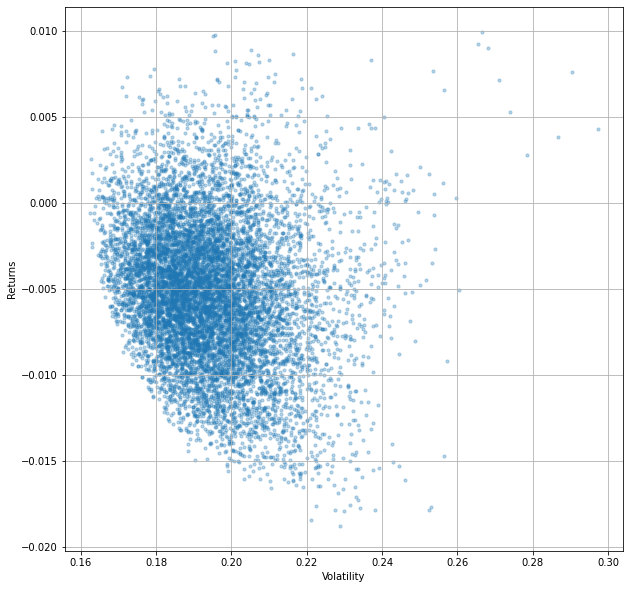

In [17]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [18]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns            -0.000578
Volatility          0.162536
ASIAN.BK weight     0.068559
TU.BK weight        0.358038
BBL.BK weight       0.295845
MTC.BK weight       0.006589
SAWAD.BK weight     0.035664
TIDLOR.BK weight    0.235305
Name: 6763, dtype: float64

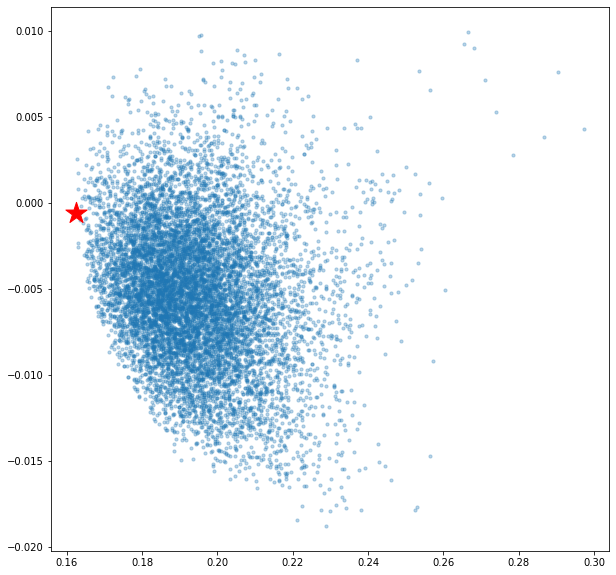

In [19]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


In [20]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns             0.009934
Volatility          0.266496
ASIAN.BK weight     0.570833
TU.BK weight        0.018225
BBL.BK weight       0.261321
MTC.BK weight       0.095414
SAWAD.BK weight     0.025488
TIDLOR.BK weight    0.028718
Name: 2906, dtype: float64

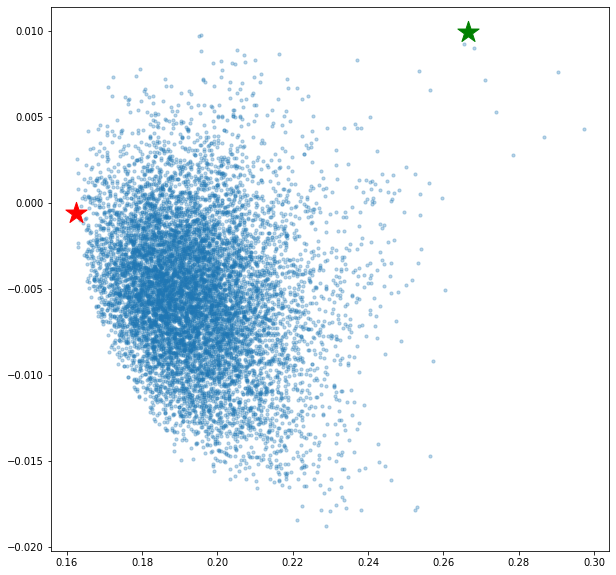

In [21]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)